In [1]:

import pandas as pd
import sys
sys.path.append("..")  # 添加上级目录

from config.contract_margin import contract_margin_ratio
from config.contract_multiplier import contract_multipliers
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  # 字号，你可以调大调小

history=pd.read_csv("../data/backtest/9999_1m_0708v3_backtest.csv")
history['datetime'] = pd.to_datetime(history['datetime'])
history=history[(history['datetime'].dt.month>=12)&((history['datetime'].dt.day>=15))]

history.columns=['datetime', 'instrument', 'open', 'close', 'high', 'low', 'volume', 'money',
       'avg', 'high_limit', 'low_limit', 'paused', 'factor', 'open_interest',
       'contract', 'change', 'vwap', 'preclose']

import pandas as pd
df = pd.read_csv("../data/output/evaluation_results_alstm/test_predictions.csv")
df.columns = ['datetime', 'instrument', 'pred', 'true']
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
merged_df = pd.merge(
    df,
    history,
    on=['datetime', 'instrument'],  # 按这两列合并
    how='inner'  # 合并方式：inner/outer/left/right
)

merged_df['Multiplier'] = merged_df['instrument'].map(contract_multipliers)
merged_df['Margin_ratio'] = merged_df['instrument'].map(contract_margin_ratio)

      contract direction          entry_time  entry_price           exit_time  \
0  AP9999.XZCE      long 2024-12-17 14:05:00  7689.583994 2024-12-17 14:09:00   
1  AP9999.XZCE      long 2024-12-18 10:03:00  7420.000000 2024-12-18 10:07:00   
2  AP9999.XZCE      long 2024-12-18 14:50:00  7270.000000 2024-12-18 14:54:00   
3  AP9999.XZCE      long 2024-12-20 14:02:00  7279.000000 2024-12-20 14:06:00   
4  AP9999.XZCE      long 2024-12-23 10:39:00  7102.815899 2024-12-23 10:43:00   

    exit_price    return    gross_pnl         fee      net_pnl         margin  \
0  7673.000000 -0.002157 -4311.838352  399.427184 -4711.265536  199929.183835   
1  7420.286193  0.000039    74.410202  385.847441  -311.437239  192920.000000   
2  7268.941566 -0.000146  -285.777251  392.551422  -678.328673  196290.000000   
3  7288.085326  0.001248  2453.038138  393.311304  2059.726835  196533.000000   
4  7113.000000  0.001434  2851.548310  398.042845  2453.505465  198878.845169   

   position_size  
0      

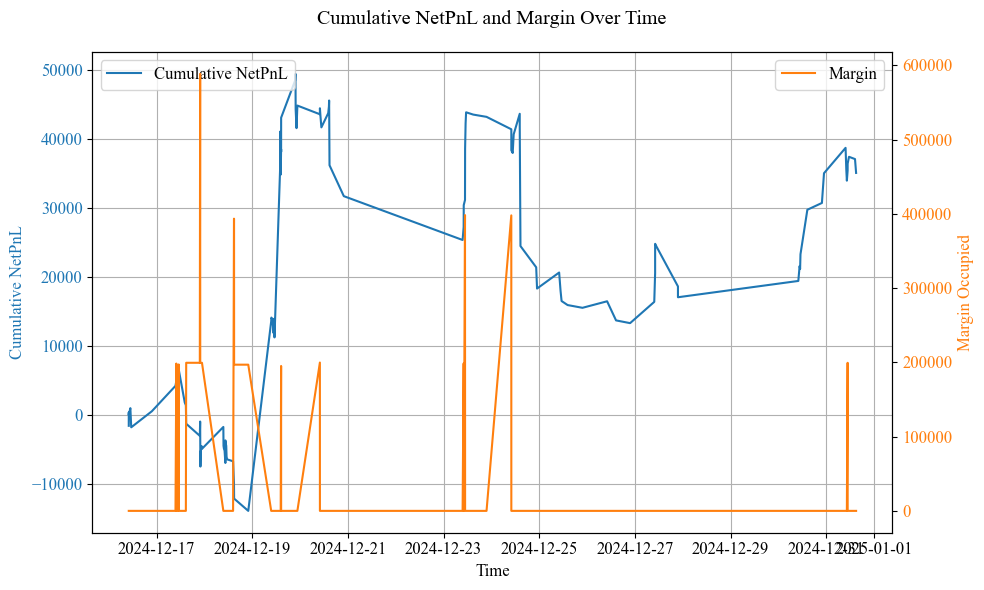

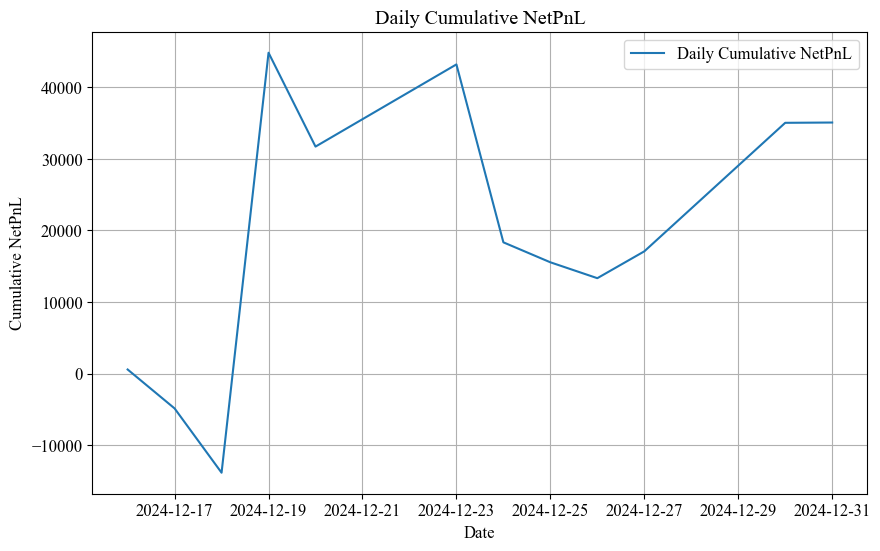

Annualized Return: 36.84%
Annualized Volatility: 16.45%
Sharpe Ratio: 2.24
Max Drawdown: -1.54%


In [11]:
from src.backtest_generate_trade import generate_trade_records
from src.backtest_analyze import analyze_trade_performance
trade_records_df = generate_trade_records(
    merged_df=merged_df,
    long_threshold=1,
    short_threshold=1,
    fee_rate=1e-4,
    risk_control=True,
    account=2_000_000,
    position_ratio=0.1,
    holding_minutes=5,
    confirm_times= 21
)

print(trade_records_df.head())



daily_df = analyze_trade_performance(trade_records_df, account=2_000_000)
